# Analyse de la courbe de dissociation de H<sub>2</sub>
_Adapté de __L'actualité chimique__ - "Liaison(s) chimique(s) Forces ou énergie? En tout cas, électrostatique!", P. Chaquin, C. Gutlé et P. Reinhardt, avril 2014_

In [1]:
%%capture
!pip install findiff

On se place dans le cadre de l'approximation de Born Oppenheimer. Nous allons étudier les variations des différentes composantes de l'énergie totale et utiliser le [théorème du viriel](https://en.wikipedia.org/wiki/Virial_theorem#In_quantum_mechanics).

## Courbe d'énergie potentielle
### Découpage énergétique
L'énergie totale s'écrit comme la sommes des énergies potentielles et cinétiques. L'énergie potentielle est divisée en 3 composantes, l'interaction Noyau/Noyau, l'interaction Noyau/électrons et l'interaction interélectronique.
\begin{align}
E(R) & = V(R) + T(R)\\
V(R) & = V_{NN} + V_{Ne} + V_{ee}
\end{align}
### Théorème du viriel
Dans le cadre d'une molécule diatomique, le théorème du viriel relie l'énergie totale aux énergies cinétiques et potentielles par les relations :
\begin{align}
T(R) & = -E(R) -R\frac{dE(R)}{dR}\\
V(R) & = 2E(R) -R\frac{dE(R)}{dR}
\end{align}
E(R) est une courbe de Morse:
\begin{align}
E(R) & = D_e \left[ 1-\exp^{(-\beta(R-R_e))}\right]^2 - D_e
\end{align}

<div style="background-color:lavender;
            padding: 5px;
border-radius: 5px 5px 5px;
border: 3px solid DodgerBlue;
padding-left: 25px;
position:relative;font-size: 18px;">
Tracer E(R), V(R) et T(R) en choisissant $D_e$ et $R_e$ avec $\beta = 1.0 a_0^{-1}$, puis tracer la décomposition de l'énergie potentielle en énergie de répulsion nucléaire et énergie électronique.
</div>


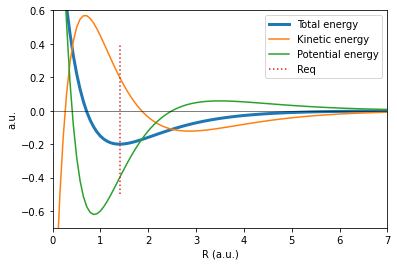

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from findiff import FinDiff

D_e=0.2
R_e=1.4
beta=1

def morse(R, D_e, R_e, beta):
    return D_e * ( 1 - np.exp(-beta*(R-R_e)))**2 - D_e

def Ecin(R, E):
    dr = R[1]-R[0]
    d_dR = FinDiff(0, dr, 1)
    res = -E-R*d_dR(E)
    return res

def Epot(R,E):
    dr = R[1]-R[0]
    d_dR = FinDiff(0, dr, 1)
    res = 2*E+R*d_dR(E)
    return res

def V_NN(R):
    return 1/R

def V_el(R, Epot):
    return Epot-V_NN(R)

R=np.linspace(0.01, 7, 100)
E=morse(R, D_e, R_e, beta)
T=Ecin(R, E)
V=Epot(R, E)

fig, ax = plt.subplots(1)

ax.plot(R, E, label = "Total energy", lw=3)
ax.plot(R, T, label = "Kinetic energy")
ax.plot(R, V, label = "Potential energy")
ax.plot([R_e, R_e], [-0.5, 0.4], ls=':', label="Req")
ax.legend(loc="upper right")
ax.axhline(0, color='black', linewidth=.5)
plt.ylim(-0.7, 0.6)

plt.ylabel('a.u.')
plt.xlim(0, 7)
plt.xlabel("R (a.u.)")
plt.show()

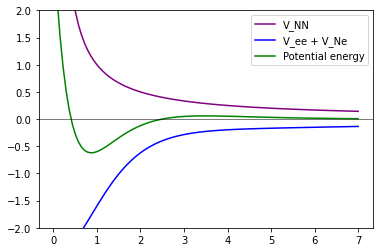

In [3]:
fig, ax = plt.subplots(1)
ax.plot(R, V_NN(R), label = "V_NN", color="purple")
ax.plot(R, V_el(R, V), label = "V_ee + V_Ne", color="blue")
ax.plot(R, V, label = "Potential energy", color="green")
ax.legend(loc="upper right")
ax.axhline(0, color='black', linewidth=.5)
plt.ylim(-2, 2)
plt.show()

## Force
La force qui s'exerce sur un noyau A s'écrit:
\begin{align}
F_A & = -\frac{dE}{dR}
\end{align}
Elle s'écrit comme la somme de la force exercée par l'autre atome $F_{NA}$ et de la force exercée par les électrons $F_{eA}$ sur cet atome.

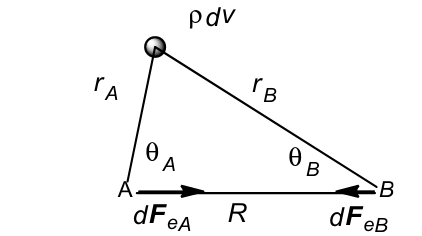

On obtient:
\begin{align}
F_{NA} & =  F_{NB} = \frac{Z_AZ_B}{R^2}\\
dF_{eA} & = -\left[\frac{Z_A}{r_A^2}\cos\theta_A\right]\rho dV\\
dF_{eB} & = -\left[\frac{Z_B}{r_B^2}\cos\theta_B\right]\rho dV
\end{align}
Comme les forces dues aux électrons sont égales, on peut écrire:
\begin{align}
F_{eA} = F_{eB} = \int dF_{eA} = \int dF_{eB} & = -\frac{1}{2}\left[\frac{Z_A}{r_A^2}\cos\theta_A + \frac{Z_B}{r_B^2}\cos\theta_B\right]\rho dV = -\frac{1}{2}\int f(x,y,z)\rho dV
\end{align}
$f(x,y,z)$ est la fonction de force [1]. Elle indique le caractère liant (f>0 en rouge), antiliant (f<0 en bleu) ou non liant (f=0 vert/jaune) de la force exercée par la densité électronique en un point de l'espace:
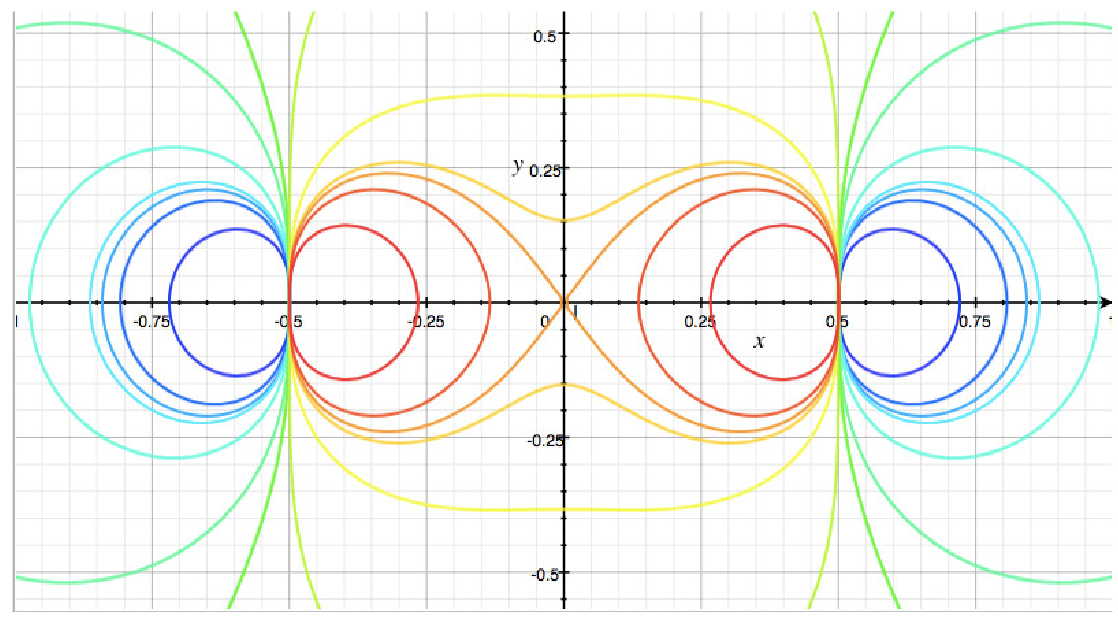

Selon l'approximation des orbitales molécualires comme combinaison linéaire d'orbitales atomiques, la liaison se produit grâce à une orbitale occupée liante $\sigma$:
![Diagramme d'OM de H2](OM.png)

Elle est stabilisée de $\frac{\beta}{1+S}$ avec $\beta=\left<\phi_1\right|\hat{H}\left|\phi_2\right>$.
Si l'on fait le produit des OM liantes en antiliantes de H$_2$ par la fonction de force, on obtient :
![Produit des orbitales moléculaires par la fonction de force](forces.png)

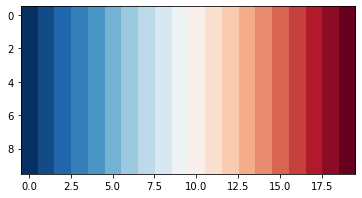

In [4]:
import scipy.linalg

def z_func(x, y):
    AX = np.array([x+0.5,y])
    BX = np.array([x-0.5,y])
    rA = scipy.linalg.norm(AX)
    rB = scipy.linalg.norm(BX)
    rA2 = rA**2
    rB2 = rB**2
    cosA = (x+0.5)/rA
    cosB = (0.5-x)/rB
    return -0.5*( cosA/rA2+cosB/rB2 )

x = np.arange(-1.0,1.0,0.1)
y = np.arange(-0.5,0.5,0.1)
X,Y = np.meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

plt.imshow(Z,cmap=plt.cm.RdBu)

[1]  Theodore Berlin, "Binding Regions in Diatomic Molecules", J. Chem. Phys. 19, 208-213 (1951)

In [5]:
X = np.arange(-1.0,1.0,0.01)
Y = np.arange(-0.5,0.5,0.01)
A = np.array([-0.5,0])
B = np.array([0.5,0])
fio = open("data.csv","w")
for x in X:
    for y in Y:
        H = np.array([x,0])
        pt = np.array([x,y])
        AX = pt-A
        BX = pt-B
        rA = np.linalg.norm(AX)
        rB = np.linalg.norm(BX)
        AH = H[0]-A[0]
        HB = B[0]-H[0]
        cosA = AH/rA
        cosB = HB/rB
        val = cosA/(rA**2) + cosB/(rB**2)
        fio.write("{},{},{}\n".format(x, y, val))
    fio.write("\n")
fio.close()

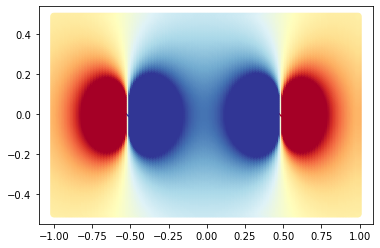

In [8]:
X = np.arange(-1.0,1.0,0.01)
Y = np.arange(-0.5,0.5,0.01)
A = np.array([-0.5,0])
B = np.array([0.5,0])
fio = open("data.csv","w")
val=[]
xval=[]
yval=[]
for x in X:
    for y in Y:
        H = np.array([x,0])
        pt = np.array([x,y])
        AX = pt-A
        BX = pt-B
        rA = np.linalg.norm(AX)
        rB = np.linalg.norm(BX)
        AH = H[0]-A[0]
        HB = B[0]-H[0]
        cosA = AH/rA
        cosB = HB/rB
        xval.append(x)
        yval.append(y)
        val.append(cosA/(rA**2) + cosB/(rB**2))
plt.scatter(xval,yval,c=np.array(val),cmap="RdYlBu")
plt.clim(-10,10)
plt.show()